In [166]:
import sys
sys.path.append("../")

from utils.utils import plot_simulated_meshgrid, plot_collage
import model
import gt_sampling

import numpy as np
import torch
import bbobtorch

In [175]:
# create ground truth functions
n_dim = 2
samples = 1000
seed = 42

# set seed
torch.manual_seed(seed)
problem_f01 = bbobtorch.create_f01(n_dim, seed=seed)

In [176]:
# sampling from groundtruth functions
sample_f01 = gt_sampling.get_sample(problem_f01, n_samples=samples, n_dim=2, seed=42, method='random')

c:\Users\tzehl\Documents\programming\OptimizationTestfunctionGeneration\main\gt_sampling.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_sample = torch.tensor(result[i], dtype=torch.float64).reshape((1, n_dim)).float()


In [177]:
X_input = sample_f01[0]

## Simulate the function with NN

In [178]:
input_dim = 2
hidden_dim = 16
hidden_layers = 8
output_dim = 1

learning_rate = 1e-4
num_epochs = 1000

m = model.NN1(input_dim, hidden_dim, hidden_layers)
optimizer = torch.optim.SGD(m.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()
y = bbobtorch.create_f01(2)(X_input)
mean, std = y.mean(), y.std()
# Training loop
for epoch in range(num_epochs):
    preds = m(X_input)
    preds = preds * std + mean
    Karloss = criterion(preds.flatten(), y.clone().detach().flatten())

    # Backward and optimize
    Karloss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {Karloss.item():.4f}')

Epoch [20/1000], Loss: 606.6855
Epoch [40/1000], Loss: 606.3444
Epoch [60/1000], Loss: 606.0355
Epoch [80/1000], Loss: 605.6371
Epoch [100/1000], Loss: 605.0861
Epoch [120/1000], Loss: 604.2575
Epoch [140/1000], Loss: 602.8940
Epoch [160/1000], Loss: 600.3132
Epoch [180/1000], Loss: 594.3293
Epoch [200/1000], Loss: 575.2701
Epoch [220/1000], Loss: 410.6425
Epoch [240/1000], Loss: 90.0159
Epoch [260/1000], Loss: 33.7836
Epoch [280/1000], Loss: 31.8516
Epoch [300/1000], Loss: 43.4847
Epoch [320/1000], Loss: 49.8292
Epoch [340/1000], Loss: 46.9565
Epoch [360/1000], Loss: 42.9439
Epoch [380/1000], Loss: 39.9770
Epoch [400/1000], Loss: 38.4257
Epoch [420/1000], Loss: 36.4176
Epoch [440/1000], Loss: 34.1318
Epoch [460/1000], Loss: 32.2872
Epoch [480/1000], Loss: 30.8235
Epoch [500/1000], Loss: 29.3598
Epoch [520/1000], Loss: 28.0700
Epoch [540/1000], Loss: 27.2093
Epoch [560/1000], Loss: 26.1462
Epoch [580/1000], Loss: 25.3063
Epoch [600/1000], Loss: 24.4197
Epoch [620/1000], Loss: 23.5312
E

In [179]:
# generate mesh grid for plotting
with torch.no_grad():
    x = np.linspace(-5.0, 5.0, 100)
    y = np.linspace(-5.0, 5.0, 100)
    X, Y = np.meshgrid(x, y)
    mesh_samples = np.c_[X.ravel(), Y.ravel()]
    mesh_samples_tensor = torch.tensor(mesh_samples, dtype=torch.float32)
    mesh_results = m(mesh_samples_tensor).reshape(X.shape)*std + mean
    mesh_results = mesh_results.numpy()[:, ::-1]

<AxesSubplot: title={'center': 'Simulated Function from NN'}, xlabel='$x_{1}$', ylabel='$x_{2}$'>

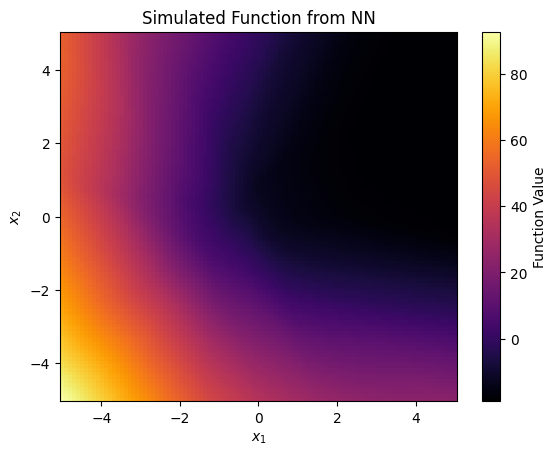

In [180]:
plot_simulated_meshgrid(X, -Y, mesh_results, model='NN')

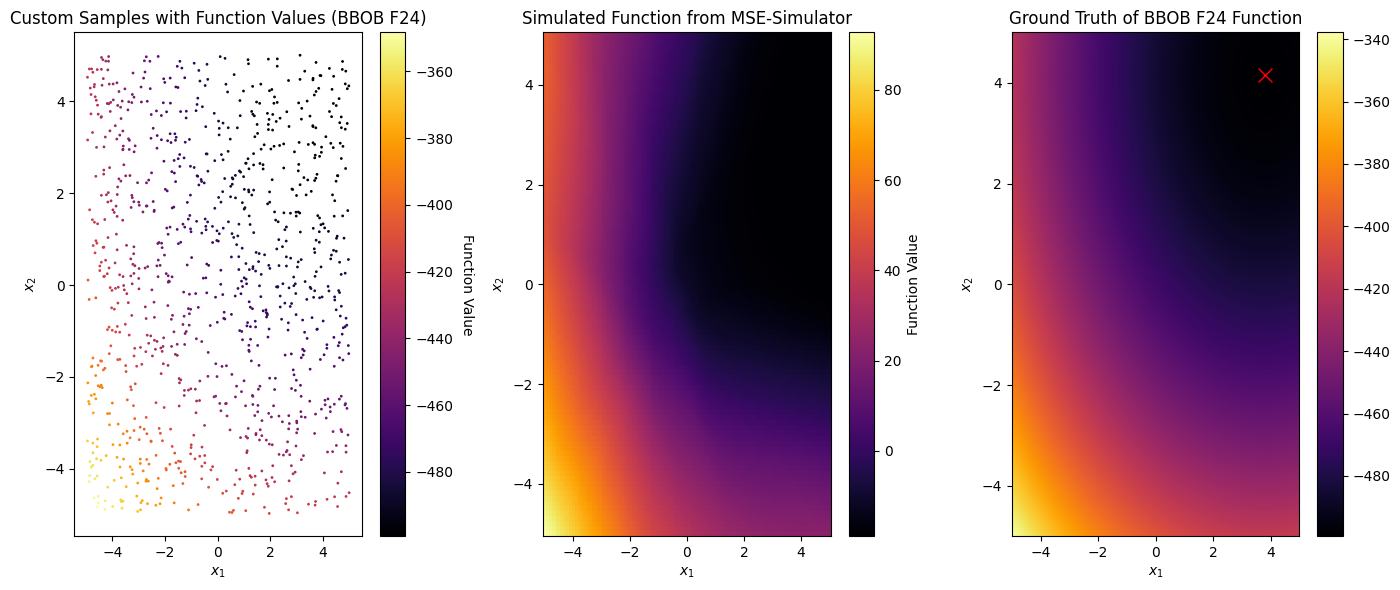

In [181]:
plot_collage(sample_f01[0].detach().numpy(), sample_f01[1].detach().numpy(), problem_f01, "BBOB F24", "MSE-Simulator", X, -Y, mesh_results);

In [174]:
sys.path.append("../")
torch.save(m.state_dict(), "../models/f01_mse_nn_model.pt")